# Inroduction to pandas

Pandas is a Python library used for working with data sets.

It has functions for analyzing, cleaning, exploring, and manipulating data.

## Don't forget to download data 
https://www.kaggle.com/datasets/himanshupoddar/zomato-bangalore-restaurants
### Import libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics


### Read Data

In [2]:
df= pd.read_csv("zomato.csv")
df.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### Business Understanding
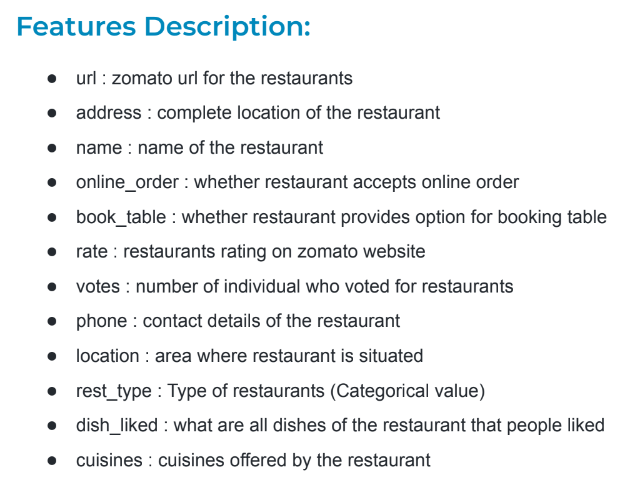


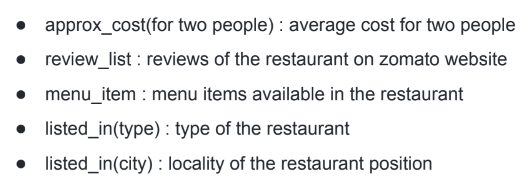

### Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [4]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [5]:
df.describe(include=['O'])

,url,address,name,online_order,book_table,rate,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
count,51717,51717,51717,51717,51717,43942,50509,51696,51490,23639,51672,51371,51717,51717,51717,51717
unique,51717,11495,8792,2,2,64,14926,93,93,5271,2723,70,22513,9098,7,30
top,https://www.zomato.com/bangalore/jalsa-banasha...,Delivery Only,Cafe Coffee Day,Yes,No,NEW,080 43334321,BTM,Quick Bites,Biryani,North Indian,300,[],[],Delivery,BTM
freq,1,128,96,30444,45268,2208,216,5124,19132,182,2913,7576,7595,39617,25942,3279


In [6]:
df.isnull().mean()*100

url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

We see that our initial impressions had some truth behind them!

Inconsistency in data formats: Numerical data with commas in it (eg: the cost column was represented as ”2,500” instead of 2500.00) which cannot be used for analysis, as well as numerical columns being represented as strings in the data (eg: the ratings column)

There are null and missing values

There are Duplicates

In [7]:
df.duplicated().sum()

0

In [8]:
df[df['name']=='Jalsa']

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
456,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Delivery,Banashankari
559,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\r\r\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Dine-out,Banashankari
2488,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Basavanagudi
2966,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Delivery,Basavanagudi
3462,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1 /5,804,080 42297555\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Paneer Lajawab, Masala Pa...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n Super ambience\nGreat...",[],Dine-out,Basavanagudi
7607,https://www.zomato.com/bangalore/jalsa-maratha...,"25/7, Doddannakundi, Outer Ring Road, Mahadeva...",Jalsa,Yes,Yes,4.2/5,2173,+91 7406617555\r\n+91 7406627555,Marathahalli,Casual Dining,"Mutton Curry, Stuffed Mushroom, Laccha Paratha...","North Indian, Mughlai","1,500","[('Rated 4.0', 'RATED\n A pretty decent place...",[],Delivery,Brookefield
19401,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,783,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Jayanagar
20399,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,783,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Delivery,Jayanagar
21302,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1 /5,783,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Dine-out,Jayanagar


We have multiple records for the same restaurant name = "Jalsa".
listed_in_type is different for each of these records such as cafes, delivery, dine-out.
Found multiple records with same listed_in_type for same location.
Other fields have same values for the records with same listed_in_type and location.

In [9]:
df2=df.copy()

In [10]:
df2.drop(['listed_in(type)','menu_item','reviews_list','approx_cost(for two people)','votes','rate','url'], inplace=True, axis=1)
df2.duplicated().sum()

16078

In [11]:
df["listed_in(type)"].value_counts()

Delivery              25942
Dine-out              17779
Desserts               3593
Cafes                  1723
Drinks & nightlife     1101
Buffet                  882
Pubs and bars           697
Name: listed_in(type), dtype: int64

### Data Cleaning

1.  Cleaning individual columns
2.  Remove the NaN values from the dataset
3.  Dropping duplicates.
4.  Transformations

 A closer analysis reveals that the missing values
correspond to branches of the restaurant that have closed
down permanently. Hence these rows were removed from
the dataset and not considered for the remainder of the
analysis

In [12]:
#Remove the NaN from rate 
df=df.dropna(subset=['rate','approx_cost(for two people)','rest_type','cuisines'])

In [13]:
df.shape

(43533, 17)

In [14]:
df.isnull().mean()*100

url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                            0.000000
votes                           0.000000
phone                           1.352997
location                        0.000000
rest_type                       0.000000
dish_liked                     46.233892
cuisines                        0.000000
approx_cost(for two people)     0.000000
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [15]:
df['rate'].head(5)

0    4.1/5
1    4.1/5
2    3.8/5
3    3.7/5
4    3.8/5
Name: rate, dtype: object

In [16]:
df['rate']=df['rate'].apply(lambda x: str(x).split('/')[0])
df['rate'].head(5)

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: object

In [17]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [18]:
df=df[df['rate']!='NEW']
df=df[df['rate']!='nan']
df=df[df['rate']!='-']

In [19]:
df['rate'].head(5)

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: object

In [20]:
df['rate']=df['rate'].astype(float)

<AxesSubplot:xlabel='rate'>

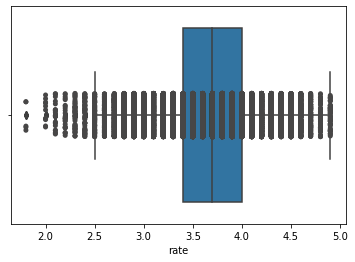

In [21]:
sns.boxplot(x='rate', data=df)
sns.stripplot(x='rate', data=df, color="#474646")

In [22]:
df['rate'].head(5)

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [23]:
df['approx_cost(for two people)'].tail(5)

51709      800
51711      800
51712    1,500
51715    2,500
51716    1,500
Name: approx_cost(for two people), dtype: object

In [24]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].apply(lambda x: str(x).replace(',',''))
df['approx_cost(for two people)'].tail(5)

51709     800
51711     800
51712    1500
51715    2500
51716    1500
Name: approx_cost(for two people), dtype: object

In [25]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '1100', '1600', '230', '130',
       '1700', '1350', '2200', '1400', '2000', '1800', '1900', '180',
       '330', '2500', '2100', '3000', '2800', '3400', '50', '40', '1250',
       '3500', '4000', '2400', '2600', '1450', '70', '3200', '240',
       '6000', '1050', '2300', '4100', '120', '5000', '3700', '1650',
       '2700', '4500', '80'], dtype=object)

In [26]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(int)

<AxesSubplot:xlabel='approx_cost(for two people)'>

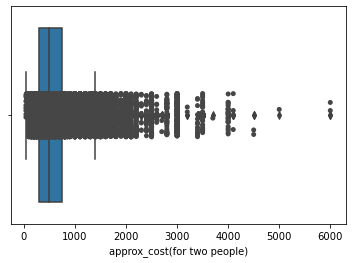

In [27]:
sns.boxplot(x='approx_cost(for two people)', data=df)
sns.stripplot(x='approx_cost(for two people)', data=df, color="#474646")

In [28]:
#Deleting Unnnecessary Columns
df3=df[["dish_liked","url","phone","listed_in(type)","reviews_list"]]
df=df.drop(["dish_liked","url","phone","listed_in(type)","reviews_list"],axis=1)

In [29]:
#sort the data based on 'rate' Descending 
df = df.sort_values(by=['name','listed_in(city)','votes'], ascending=[False,False,False])
df.head(10)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),menu_item,listed_in(city)
45985,"Hilton Bangalore Embassy GolfLinks, Embassy Go...",re:cess - Hilton Bangalore Embassy GolfLinks,No,Yes,4.1,146,Domlur,"Casual Dining, Bar","South Indian, North Indian, Continental, European",1200,[],Old Airport Road
46132,"Hilton Bangalore Embassy GolfLinks, Embassy Go...",re:cess - Hilton Bangalore Embassy GolfLinks,No,Yes,4.1,146,Domlur,"Casual Dining, Bar","South Indian, North Indian, Continental, European",1200,[],Old Airport Road
28992,"Hilton Bangalore Embassy GolfLinks, Embassy Go...",re:cess - Hilton Bangalore Embassy GolfLinks,No,Yes,4.1,146,Domlur,"Casual Dining, Bar","South Indian, North Indian, Continental, European",1200,[],Koramangala 4th Block
50269,"Ground Floor-Lobby Area, Brigade IRV Centre, N...",nu.tree,Yes,No,4.3,185,Whitefield,"Quick Bites, Beverage Shop","North Indian, Healthy Food, Beverages",400,[],Whitefield
51376,"12th Floor, Gamma Building, Sigma Soft Tech Pa...",nu.tree,Yes,No,4.2,52,Whitefield,Quick Bites,"North Indian, Healthy Food, Beverages",400,[],Whitefield
48901,"36 Aarush, Sri Balaji Layout, Ambulipura, Sarj...",nu.tree,Yes,No,4.3,300,Sarjapur Road,Delivery,"North Indian, Healthy Food, Beverages",400,[],Sarjapur Road
40984,"Ground Floor-Lobby Area, Brigade IRV Centre, N...",nu.tree,Yes,No,4.3,178,Whitefield,"Quick Bites, Beverage Shop","North Indian, Healthy Food, Beverages",400,"['Fruit Porridge Meal', 'Dum Aloo and Chapathi...",Marathahalli
16258,"36 Aarush, Sri Balaji Layout, Ambulipura, Sarj...",nu.tree,Yes,No,4.4,280,Sarjapur Road,Delivery,"North Indian, Healthy Food, Beverages",400,[],HSR
7110,"Ground Floor-Lobby Area, Brigade IRV Centre, N...",nu.tree,Yes,No,4.3,170,Whitefield,"Quick Bites, Beverage Shop","North Indian, Healthy Food, Beverages",400,"['Fruit Porridge Meal', 'Dum Aloo and Chapathi...",Brookefield
3812,"36 Aarush, Sri Balaji Layout, Ambulipura, Sarj...",nu.tree,Yes,No,4.4,278,Sarjapur Road,Delivery,"North Indian, Healthy Food, Beverages",400,[],Bellandur


In [30]:
#Removing the Duplicates except the first row which has the highest voting because it is the updating one.
df.drop_duplicates(inplace=True,keep='first')
df.head(10)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),menu_item,listed_in(city)
45985,"Hilton Bangalore Embassy GolfLinks, Embassy Go...",re:cess - Hilton Bangalore Embassy GolfLinks,No,Yes,4.1,146,Domlur,"Casual Dining, Bar","South Indian, North Indian, Continental, European",1200,[],Old Airport Road
28992,"Hilton Bangalore Embassy GolfLinks, Embassy Go...",re:cess - Hilton Bangalore Embassy GolfLinks,No,Yes,4.1,146,Domlur,"Casual Dining, Bar","South Indian, North Indian, Continental, European",1200,[],Koramangala 4th Block
50269,"Ground Floor-Lobby Area, Brigade IRV Centre, N...",nu.tree,Yes,No,4.3,185,Whitefield,"Quick Bites, Beverage Shop","North Indian, Healthy Food, Beverages",400,[],Whitefield
51376,"12th Floor, Gamma Building, Sigma Soft Tech Pa...",nu.tree,Yes,No,4.2,52,Whitefield,Quick Bites,"North Indian, Healthy Food, Beverages",400,[],Whitefield
48901,"36 Aarush, Sri Balaji Layout, Ambulipura, Sarj...",nu.tree,Yes,No,4.3,300,Sarjapur Road,Delivery,"North Indian, Healthy Food, Beverages",400,[],Sarjapur Road
40984,"Ground Floor-Lobby Area, Brigade IRV Centre, N...",nu.tree,Yes,No,4.3,178,Whitefield,"Quick Bites, Beverage Shop","North Indian, Healthy Food, Beverages",400,"['Fruit Porridge Meal', 'Dum Aloo and Chapathi...",Marathahalli
16258,"36 Aarush, Sri Balaji Layout, Ambulipura, Sarj...",nu.tree,Yes,No,4.4,280,Sarjapur Road,Delivery,"North Indian, Healthy Food, Beverages",400,[],HSR
7110,"Ground Floor-Lobby Area, Brigade IRV Centre, N...",nu.tree,Yes,No,4.3,170,Whitefield,"Quick Bites, Beverage Shop","North Indian, Healthy Food, Beverages",400,"['Fruit Porridge Meal', 'Dum Aloo and Chapathi...",Brookefield
3812,"36 Aarush, Sri Balaji Layout, Ambulipura, Sarj...",nu.tree,Yes,No,4.4,278,Sarjapur Road,Delivery,"North Indian, Healthy Food, Beverages",400,[],Bellandur
44778,"115,18th Main Road, Indiranagar, Bangalore",iSpice Resto Cafe,Yes,No,3.7,32,Indiranagar,Quick Bites,"North Indian, Chinese, Fast Food",500,[],Old Airport Road


In [31]:
df.shape

(31741, 12)

array([[<AxesSubplot:title={'center':'rate'}>,
        <AxesSubplot:title={'center':'votes'}>],
       [<AxesSubplot:title={'center':'approx_cost(for two people)'}>,
        <AxesSubplot:>]], dtype=object)

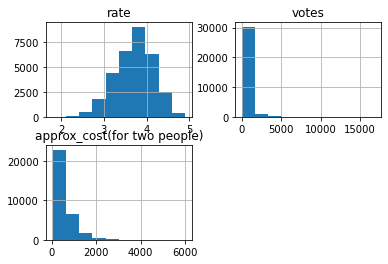

In [32]:
df.hist()

C:\Users\dina.ibrahim\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dina.ibrahim\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Types of Service')

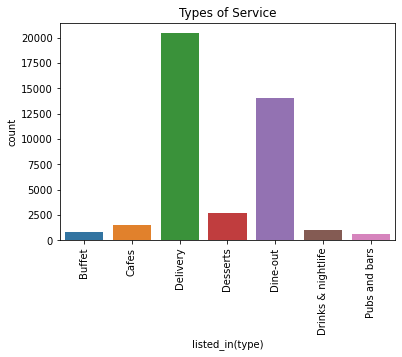

In [33]:
#Types of Services
sns.countplot(df3['listed_in(type)']).set_xticklabels(sns.countplot(df3['listed_in(type)']).get_xticklabels(), rotation=90)
plt.title('Types of Service')

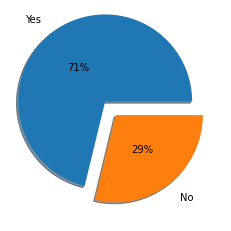

In [34]:
# resturants have online_order or not
myexplode = [0.2, 0]
plt.pie(df['online_order'].value_counts(),labels=df['online_order'].value_counts().index, explode = myexplode, shadow = True, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2)
plt.show()

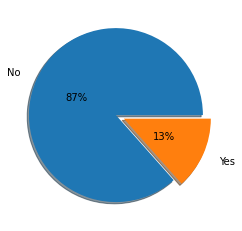

In [35]:
myexplode = [0, 0.1]
plt.pie(df['book_table'].value_counts(),labels=df['book_table'].value_counts().index, explode = myexplode, shadow = True, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2)
plt.show() 

### Regression

In [36]:
#Drop string Columns
df = df.drop(['address','name', 'listed_in(city)'], axis=1)

In [37]:
df

,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),menu_item
45985,No,Yes,4.1,146,Domlur,"Casual Dining, Bar","South Indian, North Indian, Continental, European",1200,[]
28992,No,Yes,4.1,146,Domlur,"Casual Dining, Bar","South Indian, North Indian, Continental, European",1200,[]
50269,Yes,No,4.3,185,Whitefield,"Quick Bites, Beverage Shop","North Indian, Healthy Food, Beverages",400,[]
51376,Yes,No,4.2,52,Whitefield,Quick Bites,"North Indian, Healthy Food, Beverages",400,[]
48901,Yes,No,4.3,300,Sarjapur Road,Delivery,"North Indian, Healthy Food, Beverages",400,[]
...,...,...,...,...,...,...,...,...,...
28099,Yes,No,3.9,48,HSR,Quick Bites,"Fast Food, Beverages",400,[]
16606,Yes,No,3.9,48,HSR,Quick Bites,"Fast Food, Beverages",400,[]
10182,Yes,No,3.9,48,HSR,Quick Bites,"Fast Food, Beverages",400,[]
49511,No,No,3.4,7,Bellandur,Quick Bites,Fast Food,200,[]


In [38]:
!pip install category_encoders

In [39]:
from category_encoders import BinaryEncoder
le = BinaryEncoder()
Transformed_Color_Df_2=pd.DataFrame()
cat_to_num = df[['online_order','book_table','location','rest_type','cuisines','menu_item']]
for i in cat_to_num:
    Transformed_Color_Df_2=pd.concat([Transformed_Color_Df_2,le.fit_transform(cat_to_num[[i]])], axis=1)
Transformed_Color_Df_2   

,online_order_0,online_order_1,book_table_0,book_table_1,location_0,location_1,location_2,location_3,location_4,location_5,...,menu_item_4,menu_item_5,menu_item_6,menu_item_7,menu_item_8,menu_item_9,menu_item_10,menu_item_11,menu_item_12,menu_item_13
45985,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
28992,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
50269,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
51376,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
48901,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28099,1,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
16606,1,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
10182,1,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
49511,0,1,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1


In [40]:
df.drop(columns=['online_order','book_table','location','rest_type','cuisines','menu_item'],axis=1, inplace=True)
df=pd.concat([df,Transformed_Color_Df_2], axis=1)
df

,rate,votes,approx_cost(for two people),online_order_0,online_order_1,book_table_0,book_table_1,location_0,location_1,location_2,...,menu_item_4,menu_item_5,menu_item_6,menu_item_7,menu_item_8,menu_item_9,menu_item_10,menu_item_11,menu_item_12,menu_item_13
45985,4.1,146,1200,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
28992,4.1,146,1200,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
50269,4.3,185,400,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
51376,4.2,52,400,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
48901,4.3,300,400,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28099,3.9,48,400,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16606,3.9,48,400,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10182,3.9,48,400,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
49511,3.4,7,200,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [41]:
X= df.drop("rate", axis=1)
Y=df["rate"]

In [42]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , Y , train_size = 0.7 , test_size = 0.3 , random_state = 0)

In [43]:
print('xtrain : ',len(X_train),' xtest : ',len(X_test))

xtrain :  22218  xtest :  9523


In [44]:
from sklearn.decomposition import PCA
pca = PCA(  n_components=1 )
X_features_2D = pca.fit_transform(  X_train  )

In [45]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)

C:\Users\dina.ibrahim\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [46]:
from sklearn.metrics import mean_squared_error
y_pred=lr.predict(X_test)
mean_squared_error(y_test, y_pred)

0.1336941753621864

In [47]:
from sklearn.metrics import r2_score
y_pred=lr.predict(X_test)
r2_score(y_test, y_pred)

0.3026481310843171

In [48]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('r2_score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.284121632638579
Mean Absolute Error: 0.0813824036644423
Mean Squared Error: 0.1336941753621864
Root Mean Squared Error: 0.3656421411191363
r2_score: 0.3026481310843171


In [49]:
dff=pd.DataFrame({"actual_rate":y_test , "y_pred":y_pred})
dff

,actual_rate,y_pred
33655,4.4,5.267090
42400,4.0,3.697388
18084,3.0,3.680298
32219,3.6,3.522583
49396,3.8,3.593872
...,...,...
2824,3.9,3.695190
33966,4.3,4.126953
15037,3.4,3.606567
50923,4.5,4.287231


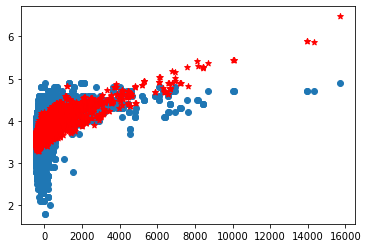

In [50]:
pca = PCA(  n_components=1 )
model_viz=pca.fit_transform(  X_test   )
plt.scatter(model_viz,y_test)
plt.scatter(model_viz,y_pred, color='r',marker='*')

C:\Users\dina.ibrahim\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


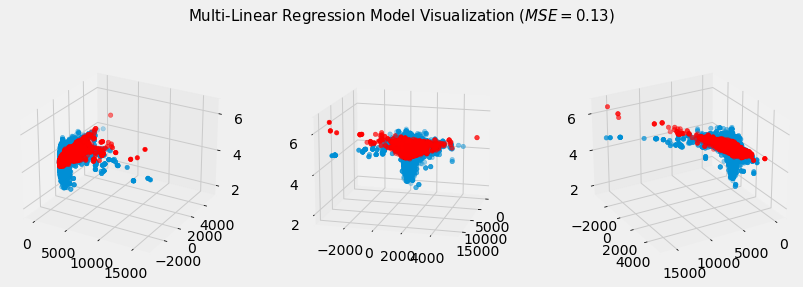

In [51]:
# Prepare data
pca = PCA(  n_components=2 )
X_features_2D = pca.fit_transform(  X_train   )
X = X_features_2D
Y = y_train


# Create range for each dimension
x = X[:, 0]
y = X[:, 1]
z = Y

model_viz=pca.fit_transform(  X_test   )
# Predict using model built on previous step
# ols = linear_model.LinearRegression()
model = LinearRegression(normalize=True)
model.fit(X, Y)
predicted = model.predict(model_viz)

mse = mean_squared_error(y_test, y_pred)

# Plot model visualization
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')
#ax4 = fig.add_subplot(130, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.scatter(model_viz[:,0],model_viz[:,1],y_pred, color='r')
    ax.scatter(x, y, z)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=25, azim=-60)
ax2.view_init(elev=15, azim=15)
ax3.view_init(elev=25, azim=60)


fig.suptitle('Multi-Linear Regression Model Visualization ($MSE = %.2f$)' % mse, fontsize=15)

fig.tight_layout()

In [62]:
from sklearn.metrics import r2_score
y_train_pred=lr.predict(X_train)
r2_score(y_train, y_train_pred)

0.3042709772945197

In [63]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
x_train_poly=poly_reg.fit_transform(X_train)
lin_reg_2=LinearRegression(normalize=True)
lin_reg_2.fit(x_train_poly,y_train)

C:\Users\dina.ibrahim\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [64]:
y_train_lin_reg_2=lin_reg_2.predict(x_train_poly)
r2_score(y_train, y_train_lin_reg_2)

0.4701304638015309

In [65]:
X_test_poly=poly_reg.transform(X_test)
y_test_lin_reg_2=lin_reg_2.predict(X_test_poly)
r2_score(y_test, y_test_lin_reg_2)

-1.4096294917189624e+18

In [61]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_lin_reg_2))
print('Mean Absolute Error:', metrics.mean_absolute_percentage_error(y_test, y_test_lin_reg_2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_lin_reg_2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_lin_reg_2)))

print('r2_score:', metrics.r2_score(y_test, y_test_lin_reg_2))

Mean Absolute Error: 13369055.638153858
Mean Absolute Error: 3453398.1365680406
Mean Squared Error: 2.7024987077846534e+17
Root Mean Squared Error: 519855624.93683314
r2_score: -1.4096294917189624e+18


In [66]:
dff=pd.DataFrame({"actual_rate":y_test , "y_pred":y_test_lin_reg_2})
dff

,actual_rate,y_pred
33655,4.4,4.475830
42400,4.0,3.879150
18084,3.0,3.544434
32219,3.6,3.392822
49396,3.8,3.493164
...,...,...
2824,3.9,3.865479
33966,4.3,4.186768
15037,3.4,3.552490
50923,4.5,4.260254


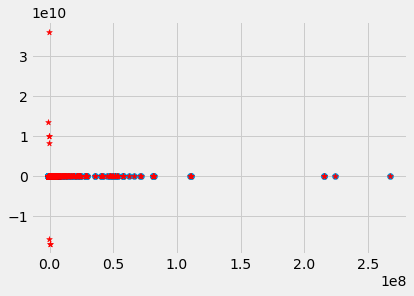

In [77]:
pca = PCA(  n_components=1 )
model_viz=pca.fit_transform(  X_test_poly   )
plt.scatter(model_viz,y_test)
plt.scatter(model_viz,y_test_lin_reg_2, color='r',marker='*')

In [72]:
from datasist.structdata import detect_outliers
# outliers for all columns
outliers_indices = detect_outliers(df, 0, df.columns)
len(outliers_indices)

23297

In [74]:
from datasist.structdata import detect_outliers
# outliers for approx_cost(for two people) column only
outliers_indices = detect_outliers(df, 0, ["approx_cost(for two people)"])
len(outliers_indices)

2008

In [75]:
df.drop(outliers_indices, inplace=True)


In [76]:
df.shape

(29733, 47)

## TRY Other Models

In [79]:
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor() 
regressor.fit(X_train,y_train)

RandomForestRegressor()